# Supervised Learning in ML

__Ques 1:  Implement KNN algorithm without using sci-kit learn library in Python.__

In [1]:
import pandas as pd
import numpy as np
import operator

In [2]:
iris = pd.read_csv('iris.data', header = None, sep =",", names =['sepal length', 'sepal width', 'petal length', 'petal width', 'Class'])

In [3]:
iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# making function for calculating euclidean distance
def E_Distance(x1, x2, length):
    distance = 0
    for x in range(length):
        distance += np.square(x1[x] - x2[x])
    return np.sqrt(distance)

In [5]:
# making function for defining K-NN model

def knn(trainingSet, testInstance, k):
    distances = {}
    length = testInstance.shape[1]  #The shape attribute for numpy arrays returns the dimensions of the array. 
   
    
    for x in range(len(trainingSet)):
        dist = E_Distance(testInstance, trainingSet.iloc[x], length)
        #print(dist)
        distances[x] = dist[0]
        
     #Sort the data in data file from smallest to largest (in ascending order) by the distances.    
    sortdist = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(sortdist[x][0])
    Count = {}  # to get most frequent class of rows
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in Count:
            Count[response] += 1
        else:
            Count[response] = 1
    sortcount = sorted(Count.items(), key=operator.itemgetter(1), reverse=True)
    return (sortcount[0][0], neighbors)

In [6]:
# making test data set
testSet = [[6.8, 3.4, 4.8, 2.4]]
test = pd.DataFrame(testSet)

In [7]:
# assigning different values to k
k1 = 3
k2 = 5

# supplying test data to the model

result1, neigh1 = knn(iris, test, k1)
result2, neigh2 = knn(iris, test, k2)

In [8]:
# printing output prediction

print(result1)
print(neigh1)
print(result2)
print(neigh2)

Iris-virginica
[141, 145, 110]
Iris-virginica
[141, 145, 110, 115, 139]


__Ques2:  Split the Iris dataset into 60% train and 40% test. Evaluate (find accuracy) of KNN algorithm on different values of K. Use sci-kit learn library to execute KNN algorithm. Take K = 1, 3, 5, 7, 9. Using matplotlib library, draw accuracy (X-axis) vs K (Y-axis) plot. What is knee point ?__

In [17]:
#Print the iris data
iris

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
print(iris.shape)

(150, 5)


In [21]:
# Feature matrix in a object named X
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = iris[features]

# response vector in a object named y
target = ['Class']
y = iris[target]

In [22]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [25]:
# splitting the data into training and test sets (60:40)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, train_size = 0.6)

In [26]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [27]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(90, 1)
(60, 1)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1, 3,5,7,9  and record testing accuracy
k_range = [1,3,5,7,9]
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

C:\Users\Nishita\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Nishita\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Nishita\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Nishita\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was ex

In [29]:
#Testing accuracy for each value of K
scores

{1: 0.9833333333333333,
 3: 0.9833333333333333,
 5: 0.9666666666666667,
 7: 0.9833333333333333,
 9: 0.9833333333333333}

In [7]:
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

plt.show()

NameError: name 'k_range' is not defined

In [38]:
#Since accuracy is same for k = 1,3,7,9 and better than for k = 5. We choose k = 3 to train the whole data

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

C:\Users\Nishita\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

__Ques3: (a) Run Naive Bayes algorithm using sci-kit learn library in Python on Weather dataset: Use dummy values for training, refer tutorial. For testing also, use dummy values as per tutorial.__

In [1]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [7]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print("Weather:",weather_encoded)

# Similarly converting temp and play string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [14]:
#Combinig weather and temp into single list of tuples
features=list(zip(weather_encoded,temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [15]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(list(features),label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


__Ques3: (b) Run Naive Bayes algorithm using sci-kit learn library in Python on Wine dataset, refer tutorial. Find accuracy of the model. <br>Run naive bayes for different configurations of train:test split, namely 50:50, 60:40, 70:30, 80:20 and 90:10. For each configuration, compute precision and recall values (both expressed as percentage). Use matplotlib to draw bar plots (in single plot) for precision & recall for each configuration. On X-axis, write configurations and on Y-axis is percentage to represent precision and recall. Use red bar for precision and blue bar for recall.__

In [15]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [16]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [17]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [18]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [19]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [21]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

k=(0.5,0.4,0.3,0.2,0.1)
recall=[]
precision=[]
for i in k:
   
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=i,random_state=109)
    gnb = GaussianNB()

    #Train the model using the training sets
    gnb.fit(X_train, y_train)
    
    #Predict the response for test dataset
    y_pred = gnb.predict(X_test)
    print("Precision:",metrics.precision_score(y_test, y_pred, average="macro"))  
    precision.append(metrics.precision_score(y_test, y_pred, average="macro"))
    print("Recall:",metrics.recall_score(y_test, y_pred, average="macro"))
    recall.append(metrics.recall_score(y_test, y_pred, average="macro"))


Precision: 0.9543266769073222
Recall: 0.957997311827957
Precision: 0.9310628019323671
Recall: 0.93482905982906
Precision: 0.9071969696969697
Recall: 0.9139515455304928
Precision: 0.9259259259259259
Recall: 0.9583333333333334
Precision: 0.875
Recall: 0.9107142857142857


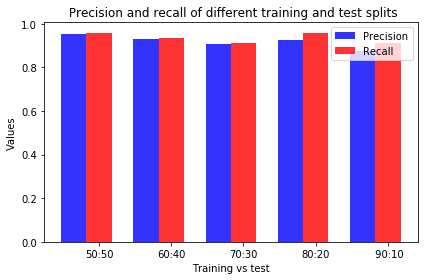

In [22]:
# data to plot
n_groups = 5
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width,
alpha=opacity,
color='b',
label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='r',
label='Recall')

plt.xlabel('Training vs test')
plt.ylabel('Values')
plt.title(' Precision and recall of different training and test splits')
plt.xticks(index + bar_width, ('50:50', '60:40', '70:30', '80:20',' 90:10'))
plt.legend()

plt.tight_layout()
plt.show()

__Ques4: Use Naive Bayes to perform sentiment analysis.
Run naive bayes for different configurations of train:test split, namely 50:50, 60:40, 70:30, 80:20 and 90:10. For each configuration, compute accuracy (expressed as percentage). Use matplotlib to draw line plot (in single plot) for accuracy percentages for each configuration. On X-axis, write configurations and on Y-axis is percentage to represent accuracy.__


In [2]:
data=pd.read_csv('train.tsv', sep='\t')

In [3]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

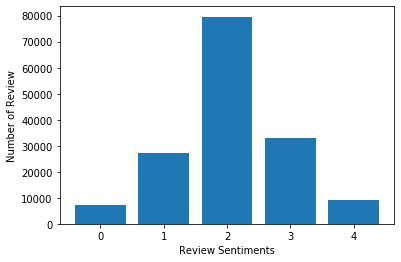

In [8]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

k=(0.5,0.4,0.3,0.2,0.1)
accuracy=[]

for i in k:
    X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=i, random_state=1)
    # Model Generation Using Multinomial Naive Bayes
    clf = MultinomialNB().fit(X_train, y_train)
    
    #Predict the response for test dataset
    predicted= clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, predicted))  
    accuracy.append(metrics.accuracy_score(y_test, predicted))

Accuracy: 0.595360758682558
Accuracy: 0.6020601050877867
Accuracy: 0.6049169122986885
Accuracy: 0.6069140074330386
Accuracy: 0.6082276047673971


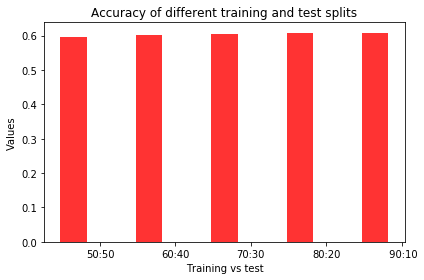

In [23]:
# data to plot
n_groups = 5
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, accuracy, bar_width,
alpha=opacity,
color='r',
label='Accuracy')

plt.xlabel('Training vs test')
plt.ylabel('Values')
plt.title('Accuracy of different training and test splits')
plt.xticks(index + bar_width, ('50:50', '60:40', '70:30', '80:20',' 90:10'))

plt.tight_layout()
plt.show()